# Imports

In [ ]:
import rasterio
from rasterio.plot import show
import rasterio.warp
import matplotlib
import matplotlib.pyplot as plt
import fiona
import numpy as np
import shapely 
from shapely.ops import unary_union
from shapely import Polygon, MultiPolygon 
import json

In [ ]:
from utilities.area import get_density_per_area
from utilities.geojson import filter_features, filter_features_by_list, get_polygons

## Boundary data
https://www.geoboundaries.org/countryDownloads.html 

United Kingdom

In [ ]:
london_boroughs = [
    'City of London', 'Westminster', 'Kensington and Chelsea', 'Hammersmith and Fulham', 'Wandsworth', 'Lambeth',
    'Southwark', 'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames',
    'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
    'Barking and Dagenham', 'Redbridge', 'Newham', 'Waltham Forest','Haringey', 'Enfield', 'Barnet', 'Harrow',
    'Hillingdon'
]
inner_city_boroughs = [
    'Islington', 'Camden', 'Westminster', 'Southwark', 'Tower Hamlets', 'Hackney', 'Lambeth'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-GBR-ADM2-all/geoBoundaries-GBR-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
    
london_borough_features = filter_features_by_list(shape_data, 'shapeName', london_boroughs)
london_borough_boundaries = get_polygons(london_borough_features, mainland=True)
inner_city_borough_features = filter_features_by_list(shape_data, 'shapeName', inner_city_boroughs)
inner_city_borough_boundaries = get_polygons(inner_city_borough_features, mainland=True)
city_of_london_features = filter_features(shape_data, 'shapeName', 'City of London')
city_of_london_boundary = get_polygons(city_of_london_features, mainland=True)['City of London']

region_polygons = london_borough_boundaries
admin_polygons = inner_city_borough_boundaries

South Africa

In [ ]:
city_of_joburg_data = fiona.open("data/2018_Regions_CoJ/2018_Regions.shp", "r")
polygons = get_polygons(city_of_joburg_data, identifier='REGION_NAM')
coj_proj = rasterio.warp.transform_geom(
    city_of_joburg_data.crs,
    rasterio.crs.CRS.from_epsg(4326),
    polygons.values()
)
admin_polygons = dict((name, Polygon(geom['coordinates'][0])) for name, geom in zip(polygons.keys(), coj_proj))
region_polygons = admin_polygons

France

In [ ]:
# for feat in shape_data['features']:
#     print(feat['properties']['shapeName'], end=', ')

In [ ]:
paris_departments = [
    'Paris', 'Val-de-Marne', 'Hauts-de-Seine', 'Seine-Saint-Denis'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-FRA-ADM2-all/geoBoundaries-FRA-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)

In [ ]:
paris_department_features = filter_features_by_list(shape_data, 'shapeName', paris_departments)
paris_department_polygons = get_polygons(paris_department_features, mainland=True)
    
paris_feature = filter_features(shape_data, 'shapeName', 'Paris')
paris_polgyon = get_polygons(paris_feature, mainland=True)['Paris']

region_polygons = paris_department_polygons
admin_polygons = [paris_polgyon]

Manila, Philipines

In [ ]:
manila_divisons = [
    'NCR, City of Manila, First District', 'NCR, Second District', 'NCR, Third District', 'NCR, Fourth District'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-PHL-ADM2-all/geoBoundaries-PHL-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)

In [ ]:
manila_divison_features = filter_features_by_list(shape_data, 'shapeName', manila_divisons)
print(len(manila_divison_features))
manila_divison_polygons = get_polygons(manila_divison_features, mainland=True)
  
region_polygons = manila_divison_polygons
admin_polygons = manila_divison_polygons

New York, USA

- change second 'Richmond' to 'Richmond, NY'
- change second 'Kings' to 'Kings, NY'

In [ ]:
geojson_filepath = 'data/geoBoundaries-USA-ADM2-all/geoBoundaries-USA-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)

In [ ]:
new_york_counties = ['New York', 'Bronx', 'Kings, NY', 'Queens', 'Richmond, NY']

In [ ]:
new_york_feature = filter_features_by_list(shape_data, 'shapeName', new_york_counties)
new_york_polygon = get_polygons(new_york_feature)

region_polygons = new_york_polygon
admin_polygons = new_york_polygon 

Israel

In [ ]:
geojson_filepath = 'data/geoBoundaries-ISR-ADM2-all/geoBoundaries-ISR-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    shape_data = json.load(f)
admin_polygons = get_polygons(shape_data['features'], mainland=True)
region_polygons = admin_polygons

### Plotting

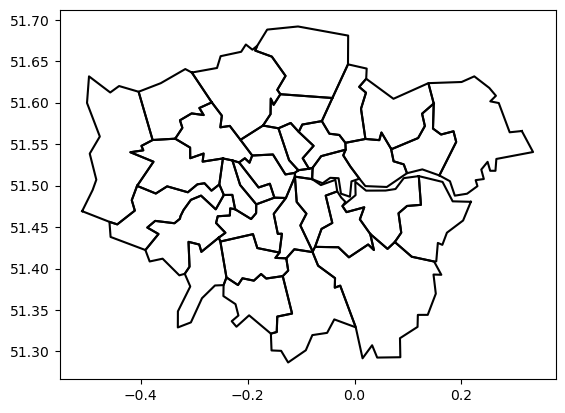

In [ ]:
fig, ax = plt.subplots()
for idx, shape in enumerate(region_polygons.values()):
    if isinstance(shape, Polygon):
        polygon = shape
        xs, ys = polygon.exterior.coords.xy
        ax.plot(xs, ys, 'k-')
    elif isinstance(shape, MultiPolygon):
        for polygon in shape.geoms:
            xs, ys = polygon.exterior.coords.xy
            ax.plot(xs, ys, 'k-')
    else:
        print(f'Shape at idx {idx} is of type {type(shape)} is not supported')
ax.plot();

In [ ]:
region_polygon = unary_union(list(region_polygons.values()))

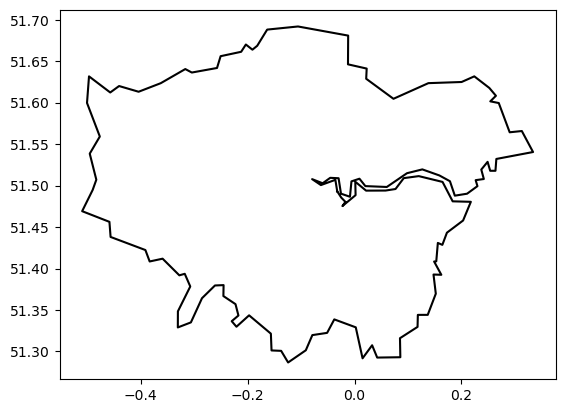

In [ ]:
fig, ax = plt.subplots()
if isinstance(region_polygon, Polygon):
    xs, ys = region_polygon.exterior.coords.xy
    ax.plot(xs, ys, 'k-');
elif isinstance(region_polygon, MultiPolygon):
    for polygon in region_polygon.geoms:
        xs, ys = polygon.exterior.coords.xy
        ax.plot(xs, ys, 'k-');

## Population Data

https://rasterio.readthedocs.io/en/latest/quickstart.html

https://hub.worldpop.org/geodata/listing?id=78

In [ ]:
raster_filepath = 'data/gbr_ppp_2020_constrained.tif' # Great Britain count / 100m
#raster_filepath = 'data/gbr_pd_2020_1km_UNadj.tif' # Great Britain density / 1km
#raster_filepath = 'data/zaf_ppp_2020_constrained.tif' # South Africa
#raster_filepath = 'data/fra_ppp_2020_constrained.tif' # France
#raster_filepath = 'data/phl_ppp_2020_constrained.tif' # Philipines
#raster_filepath = 'data/usa_ppp_2020_constrained.tif' # USA
#raster_filepath = 'data/isr_ppp_2020_constrained.tif' # Israel

In [ ]:
with rasterio.open(raster_filepath) as src:
    densities, populations_counts, areas = get_density_per_area(src, region_polygons.values())
print(f'populations_count: {populations_counts.sum():,.2f}')
print(f'area: {areas.sum()/1e6:,.2f} km^2')
print(f'density: {densities.max():,.2f} people / km^2')

populations_count: 9,187,436.63
area: 1,580.89 km^2
density: 15,997.60 people / km^2


In [ ]:
for (name, density, pop) in zip(region_polygons.keys(), densities, populations_counts):
    print(f'{name} : {pop:,.0f} people: {density:.2f} people/km^2')

City of London : 3,738 people: 1493.35 people/km^2
Barking and Dagenham : 215,816 people: 5852.23 people/km^2
Barnet : 396,698 people: 4583.75 people/km^2
Bexley : 237,836 people: 3941.20 people/km^2
Brent : 372,695 people: 8447.67 people/km^2
Bromley : 327,410 people: 2182.49 people/km^2
Camden : 234,732 people: 11047.16 people/km^2
Croydon : 391,623 people: 4559.43 people/km^2
Ealing : 363,294 people: 6647.41 people/km^2
Enfield : 354,982 people: 4280.90 people/km^2
Greenwich : 291,879 people: 6135.76 people/km^2
Hackney : 299,252 people: 15105.74 people/km^2
Hammersmith and Fulham : 205,193 people: 11681.18 people/km^2
Haringey : 288,864 people: 10094.05 people/km^2
Harrow : 273,695 people: 5290.88 people/km^2
Havering : 249,263 people: 2192.69 people/km^2
Hillingdon : 312,777 people: 2710.44 people/km^2
Hounslow : 296,252 people: 5386.77 people/km^2
Islington : 242,125 people: 15997.60 people/km^2
Kensington and Chelsea : 151,047 people: 12923.35 people/km^2
Kingston upon Thames : 

## Clip to region of intersest

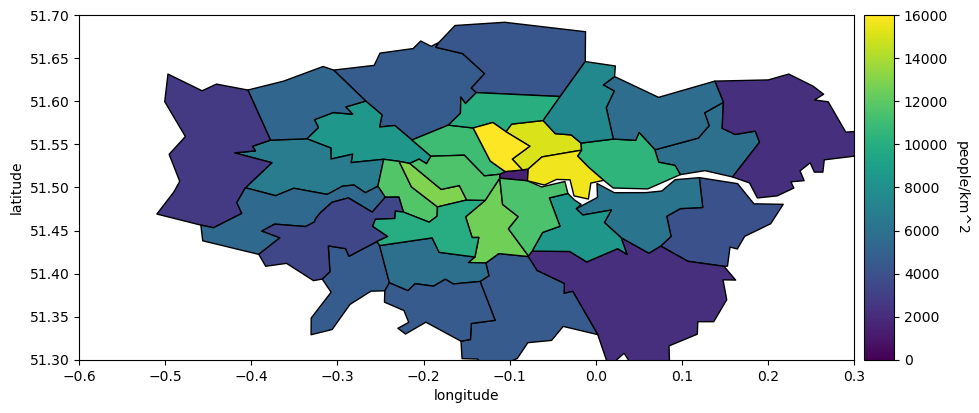

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('London population densities')

patches = []
colors = []
for polygon in region_polygons.values(): 
    patches.append(matplotlib.patches.Polygon(polygon.exterior.coords))
        
p = matplotlib.collections.PatchCollection(patches, edgecolor='k')
#colors = 100 * np.random.rand(len(patches))
colors = densities
p.set_array(colors)
vmax = 16_000
p.set_clim(0, vmax)
ax.add_collection(p)
ax.autoscale()
ax.set_aspect('equal')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

### For aligningw with population_distributions.ipynb
## London
long_limits = (-0.6, 0.30)
lat_limits = (51.30, 51.70)
## Joburg
# long_limits = (27.40, 28.60) 
# lat_limits = (-26.60, -25.80)
# ## Paris
# long_limits = (1.85, 2.60) 
# lat_limits = (48.65, 49.05)
## Manila
# long_limits = (120.5, 121.2) 
# lat_limits = (14.3, 14.8)
## New York
# long_limits = (-74.4, -73.7)
# lat_limits = (40.5, 40.92)
# ## Israel
# long_limits = (34.2, 35.90) 
# lat_limits = (29.40, 33.4)

ax.set_xlim(long_limits)
ax.set_ylim(lat_limits)
#ax.autoscale()
    
#fig.colorbar(axis_image)
cbar_axis = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.03,ax.get_position().height])
cbar = fig.colorbar(p, cbar_axis)
cbar.set_label('people/km^2', rotation=270, labelpad=15) # density

In [ ]:
#fig.savefig('densities_district.png', bbox_inches="tight")

## Gaza

In [ ]:
gaza_strip_districts = [
    'Gaza', 'Khan Yunis', 'Rafah', 'North Gaza', 'Deir Al Balah'
]

In [ ]:
geojson_filepath = 'data/geoBoundaries-PSE-ADM2-all/geoBoundaries-PSE-ADM2.geojson'
with open(geojson_filepath, 'r') as f:
    palestine_data = json.load(f)
    
gaza_features = filter_features_by_list(palestine_data, 'shapeName', gaza_strip_districts)
gaza_polygons = get_polygons(gaza_features)
#gaza_polygons = get_polygons(palestine_data['features'], mainland=True) # Israel only

In [ ]:
raster_palestine_filepath = 'data/pse_ppp_2020_constrained.tif' # population density
with rasterio.open(raster_palestine_filepath) as src:
    densities_gaza, populations_gaza, areas = get_density_per_area(src, gaza_polygons.values())
densities_gaza.max()

10158.098213656609

In [ ]:
gaza_long_min, gaza_lat_min, gaza_long_max, gaza_lat_max = MultiPolygon(gaza_polygons.values()).bounds
# gaza_origin =  np.array((gaza_long_min, gaza_lat_max)) # Israel

base_height = lat_limits[1] - lat_limits[0]  
gaza_height = (gaza_lat_max - gaza_lat_min)
gaza_origin = (long_limits[0], lat_limits[0] + base_height/2 + gaza_height/2)

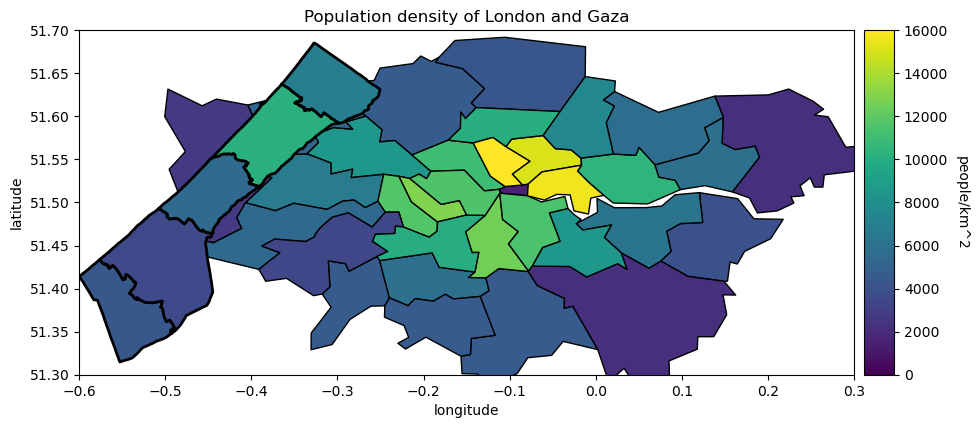

In [ ]:
#fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Population density of London and Gaza')

patches = []
colors = []
for polygon in gaza_polygons.values(): 
    translated_polygon = polygon.exterior.coords - np.array((gaza_long_min, gaza_lat_max)) + gaza_origin # ignore for Israel
    #translated_polygon = polygon.exterior.coords # only for Israel
    patches.append(matplotlib.patches.Polygon(translated_polygon,))
    
p = matplotlib.collections.PatchCollection(patches, edgecolor='k', linewidth=2, linestyle="-")
#colors = 100 * np.random.rand(len(patches))
colors = densities
p.set_array(densities_gaza)
p.set_clim(0, vmax)
ax.add_collection(p)
#ax.autoscale()
#ax.axis('equal')
fig

In [ ]:
fig.savefig('london_gaza_densities_districts.png', bbox_inches="tight")